# Mengelompokkan Pasien Berdasarkan Kasus Positif & Suspek Menggunakan Model Clustering (K-Means) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membuat isi dari kolom data
df = {"Lokasi": ["Medan Denai", "Medan Area", "Medan Belawan", "Medan Labuhan", "Medan Marelan", "Medan Deli", "Medan Timur",
                "Medan Tuntungan", "Medan Johor", "Medan Amplas", "Medan Tembung"],
        "Positif": [1, 2, 4, 5, 8, 7, 2, 4, 6, 6, 12],
        "Suspek": [8, 6, 7, 8, 4, 3, 5, 8, 4, 6, 4]}

data = pd.DataFrame(df)
data.head()

,Lokasi,Positif,Suspek
0,Medan Denai,1,8
1,Medan Area,2,6
2,Medan Belawan,4,7
3,Medan Labuhan,5,8
4,Medan Marelan,8,4


In [3]:
x = data

In [4]:
# Menghapus Beberapa kolom yang tidak dibutuhkan

x = x.drop(["Lokasi"], axis = 1)
x.head()

,Positif,Suspek
0,1,8
1,2,6
2,4,7
3,5,8
4,8,4


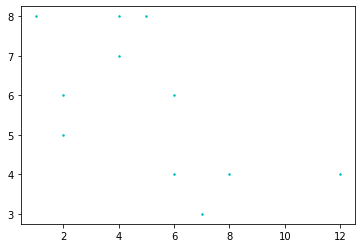

In [5]:
#Untuk memvisualisasikan persebaran data menggunakan scatter plot
plt.scatter(data.Positif , data.Suspek, s = 3, c = "c", marker = "p", alpha = 1)
plt.show()

Karena saya ingin mengelompokkan orang-orang yang terkena kasus positif dan suspek covid, maka saya akan menggunakan clustering. Clustering merupakan sebuah teknik machine learning yang termasuk ke dalam kategori unsupervised learning yang bertujuan untuk mengelompokkan/membuat label output supaya mendapatkan sebuah kesimpulan.

In [6]:
# Memanggil model K-Means dari sklearn dan menentukan nilai cluster yaitu 3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(x)

In [7]:
#Tampilkan pusat cluster
print(kmeans.cluster_centers_)

[[ 3.    7.  ]
 [12.    4.  ]
 [ 6.75  4.25]]


In [8]:
# Membuat kolom baru yang bernama "K-means" dan dimasukkan ke dalam variabel data
data["K-means"] = kmeans.labels_

In [9]:
data.head()

,Lokasi,Positif,Suspek,K-means
0,Medan Denai,1,8,0
1,Medan Area,2,6,0
2,Medan Belawan,4,7,0
3,Medan Labuhan,5,8,0
4,Medan Marelan,8,4,2


(array([6., 0., 0., 0., 0., 1., 0., 0., 0., 4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

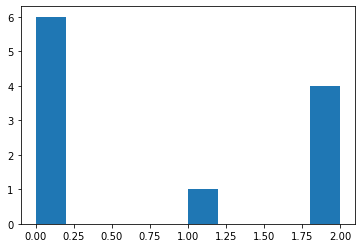

In [10]:
# Memvisualisasikan data pada histogram

plt.hist(data["K-means"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


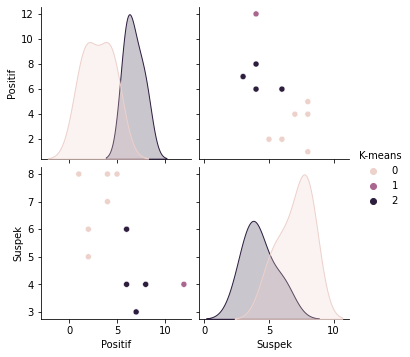

In [11]:
# Untuk menganalisa data dengan menggunakan pairplot

sns.pairplot(data, hue = "K-means")

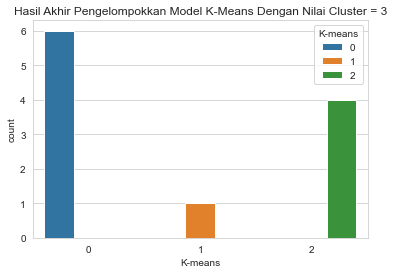

<Figure size 504x504 with 0 Axes>

In [12]:
# Melakukan visualisasi untuk kolom "K-means"

sns.set_style("whitegrid")
plt.title("Hasil Akhir Pengelompokkan Model K-Means Dengan Nilai Cluster = 3")
sns.countplot(x="K-means", hue="K-means", data=data)
plt.figure(figsize=(7, 7))
plt.show()